# Importing Necessary Dependancies

In [1]:
# %pip install -r requirements.txt

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from scipy.io import wavfile

%matplotlib inline

# Initializing Helper Functions

In [2]:
def load_music(filename):
    '''
    Takes the location of the music WAV file as a input and returns 
    the sampling frequency (Hz) of the sound file, the time array 
    of the digital sound signal (sec), and the sound channels.
    
    inputs:
        filename (str)
    outputs:
        fs (int)
        t List[float]
        channels List[List[float]]
    '''
    fs, data = wavfile.read(filename)
    num_channels = np.shape(data)[1]
    
    L = np.shape(data)[0]
    t = np.array(range(0, L))/fs

    channels = {}
    for n in range(num_channels):
        channels[str(n+1)] = [data[i][n] for i in range(L)]
    
    return fs, t, channels

def write_music(filename, data, fs):
    '''
    Writes the sound data into a WAV file with location filename. 
    The sampling frequency is given in Hz, and the data is given as
    a dictionary of which the values are the channels in the music file.
    
    inputs:
        filename (str)
        data Dict{any: List[float]}
        fs (int)
    outputs:
        None
    '''
    df = pd.DataFrame(data)
    wavfile.write(filename=filename, rate=fs, data=np.array(df).astype(np.int16))
    return None

def freq_spectrum(data, fs, lim=None):
    '''
    Plots the frequency spectrum of music channels with sampling frequency fs (Hz).
    
    inputs:
        data List[float]
        fs (int)
        lim (optional to limit plots x-axis) (float)
    outputs:
        None
    '''
    N = np.size(data)

    yf = fft(data) # fft of the signal 

    xf = fftfreq(N, 1/fs)
    xf = fftshift(xf) #  preparing the x-axis for the spectrum

    yplot = fftshift(yf)

    plt.plot(xf, 1.0/N * np.abs(yplot))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    if lim is not None:
        plt.xlim([-lim,lim])
    plt.grid()
    return None

# Analog to Digital Conversions

In [3]:
fs, t, channels = load_music('morganFreeman.wav')

In [4]:
channel1 = np.array(channels['1'])
channel2 = np.array(channels['2'])

N = np.logical_and(165 < t, t <= 225) # trimming a second from it
t = t[N]
t = t - t[0]
channel1 = channel1[N]
channel2 = channel2[N]

## Adjusting the Sample Rate

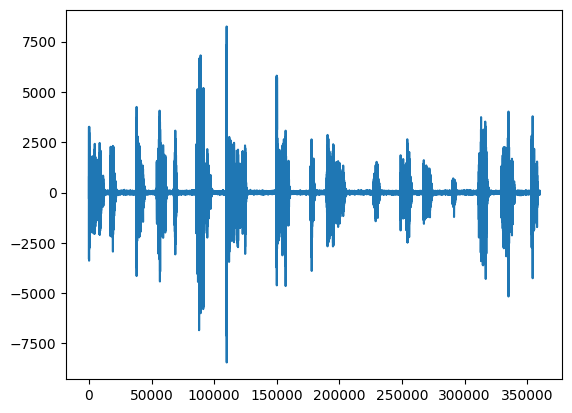

In [5]:
sample_rate = 6000
actual_sample_rate = int(fs/sample_rate)
# Resampled signal
channel1_resampled = channel1[::actual_sample_rate]
channel2_resampled = channel2[::actual_sample_rate]
write_music('morganFreemanResampled.wav',{'1': channel1_resampled,'2':channel2_resampled},sample_rate)
plt.plot(channel1_resampled)

## Amplitude Modulation

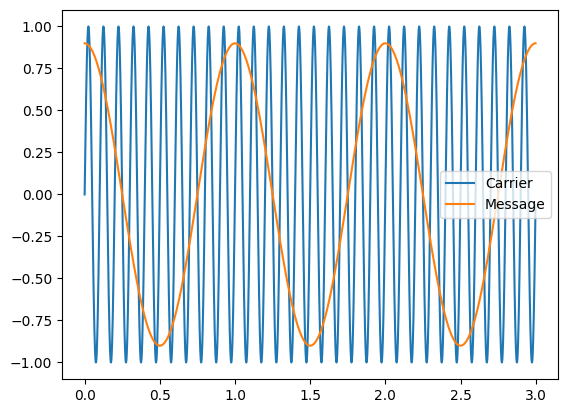

In [7]:
t = np.arange(0,3,0.001)
A = 1
m = 0.9
fc = 10
fm = 1

carrier = A*np.sin(2*np.pi*fc*t)
message = m*A*np.cos(2*np.pi*fm*t)

plt.plot(t, carrier);
plt.plot(t, message);
plt.legend(['Carrier', 'Message']);

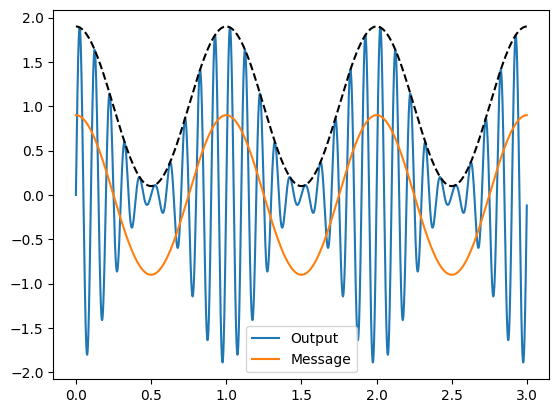

In [8]:
output = (1 + message/A)*carrier
plt.plot(t, output);
plt.plot(t, message);
plt.plot(t, message+1, 'k--');
plt.legend(['Output', 'Message']);

## Applying AM to an Audio Signal

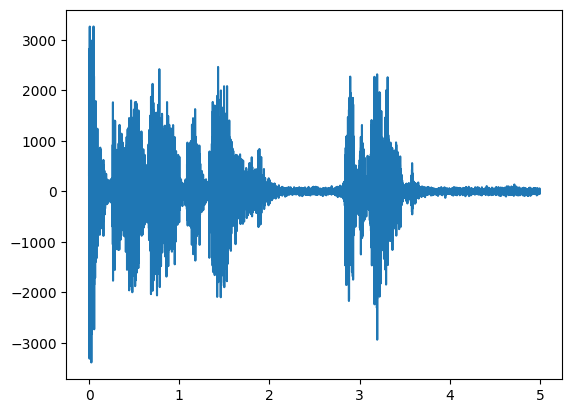

In [9]:
fs, t, channels = load_music('morganFreemanResampled.wav')
channel1 = np.array(channels['1'])
channel2 = np.array(channels['2'])

N = np.logical_and(0 < t, t <= 5) # trimming a second from it
t = t[N]
t = t - t[0]
channel1 = channel1[N]
channel2 = channel2[N]

plt.plot(t, channel1);

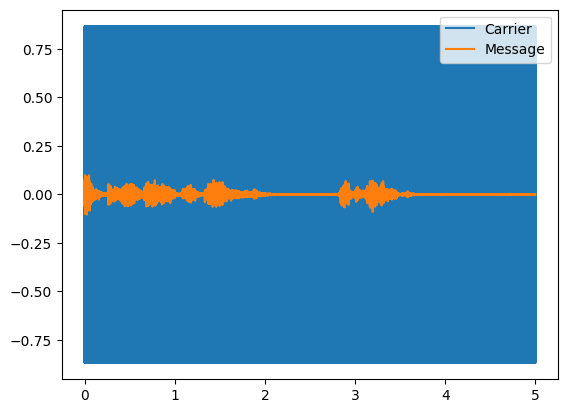

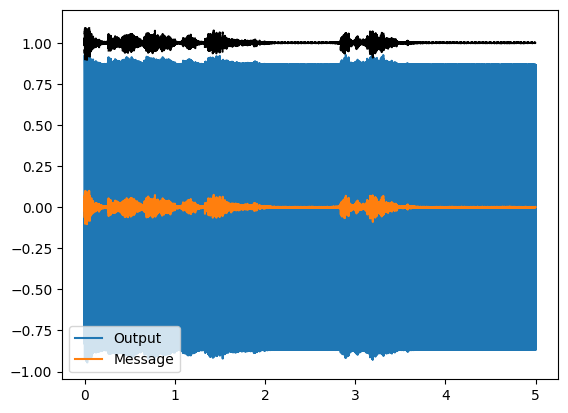

In [10]:
A = 1
m = 0.3
fc = 535000

carrier = A*np.sin(2*np.pi*fc*t)
message = channel1/(2**16/2)

plt.plot(t, carrier);
plt.plot(t, message);
plt.legend(['Carrier', 'Message']);
plt.show()

output = (1 + message/A)*carrier
plt.plot(t, output);
plt.plot(t, message);
plt.plot(t, message+1, 'k--');
plt.legend(['Output', 'Message']);
plt.show()

# Demodulating the Audio Signal (recovering the original sound)

In [11]:
message = message*(2**16/2) # Scaling by same factor as beginning so its audible
write_music('AM_retrieved_sound.wav', {'1':message},sample_rate)